# Atividade 4 - Comparação dos classificadores LogisticRegression e KNeighborsClassifier

- Para desenvolvimento desta atividade utilizei o dataset iris
- Utilizado Pipeline com objetivo de realizar os passos de padronização dos dados com StandardScaler e definição do algoritmo utilizado para geração do modelo
- Para a geração do modelo de forma mais justa, foi utilizado o GridSearchCV para geração dos hiperparâmetros serem gerados de forma automática, evitando assim que coloquemos o nosso sentimento para se chegar a resultados supostamente melhores.
- Foi utilizado cross_validate com validação aninhada.
- Métricas de avaliação utilizadas: average_precision_score e accuracy_score.
- Como resultados foi impresso os melhores estimadores de cada modelo.
- Plotado gráficos de barras comparando as métricas de cada algoritmo.

# Carregando dados do dataset

In [497]:
from sklearn.datasets import load_iris


iris = load_iris()
iris.keys()

X, y = iris.data, iris.target

# Utilizando LogisticRegression

In [498]:
from sklearn.metrics import accuracy_score, make_scorer, precision_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

#Com Padronização
pipeline = Pipeline([
    ("padronizacao", StandardScaler()),
    ("lr", LogisticRegression())
])

parametros = {'lr__penalty': ['l1'],
              'lr__solver':['lbfgs','liblinear']}
            
scoring = {'precision': make_scorer(precision_score, average='macro'), 'accuracy': make_scorer(accuracy_score)}
modelo = GridSearchCV(pipeline, parametros, scoring=scoring, refit='accuracy')

scores = cross_validate(modelo, X, y,cv=10, scoring=scoring,return_estimator=True)

compadAcuraccy = np.mean(scores['test_accuracy'])
compadPrecision = np.mean(scores['test_precision'])
print(f"LogisticRegression com padronização - accuracy: {compadAcuraccy}")
print(f"LogisticRegression com padronização - precision: {compadPrecision}")

#Sem Padronização             
pipeline1 = Pipeline([
    ("lr", LogisticRegression())
])

modelo1 = GridSearchCV(pipeline1, parametros, scoring=scoring, refit='accuracy')

scores1 = cross_validate(modelo1, X, y,cv=10, scoring=scoring,return_estimator=True)

sempadAcuraccy1 = np.mean(scores1['test_accuracy'])
sempadPrecision1 = np.mean(scores1['test_precision'])
print(f"LogisticRegression sem padronização - accuracy: {sempadAcuraccy1}")
print(f"LogisticRegression sem padronização - precision: {sempadPrecision1}")


LogisticRegression com padronização - accuracy: 0.9400000000000001
LogisticRegression com padronização - precision: 0.9493650793650794
LogisticRegression sem padronização - accuracy: 0.9600000000000002
LogisticRegression sem padronização - precision: 0.9638888888888889


# Melhores Estimadores LogisticRegression com padronização

In [499]:
for estimator in scores['estimator']:
    print(estimator.best_estimator_)

Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('padronizacao', StandardScaler()),
                ('lr', Logistic

# Melhores Estimadores LogisticRegression sem padronização

In [500]:
for estimator in scores1['estimator']:
    print(estimator.best_estimator_)

Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])
Pipeline(steps=[('lr', LogisticRegression(penalty='l1', solver='liblinear'))])


# Utilizando KNeighborsClassifier

In [501]:
from sklearn.neighbors import KNeighborsClassifier
# Com Padronização
pipeline2 = Pipeline([
    ("padronização", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

parametros2 = {'knn__n_neighbors': [1,3,5,7,9]}

modelo2 = GridSearchCV(pipeline2, parametros2, scoring=scoring, refit='accuracy')

scores2 = cross_validate(modelo2, X, y,cv=10, scoring=scoring, return_estimator=True)

compadAcuraccy2 = np.mean(scores2['test_accuracy'])
compadPrecision2 = np.mean(scores2['test_precision'])
print(f"KNeighborsClassifier com padronização - accuracy: {compadAcuraccy2}")
print(f"KNeighborsClassifier com padronização - precision: {compadPrecision2}")


# Sem padronização
pipeline3 = Pipeline([
    ("knn", KNeighborsClassifier())
])
modelo3 = GridSearchCV(pipeline3, parametros2, scoring=scoring, refit='accuracy')

scores3 = cross_validate(modelo3, X, y,cv=10, scoring=scoring, return_estimator=True)

sempadAcuraccy3 = np.mean(scores3['test_accuracy'])
sempadPrecision3 = np.mean(scores3['test_precision'])
print(f"KNeighborsClassifier sem padronização - accuracy: {sempadAcuraccy3}")
print(f"KNeighborsClassifier sem padronização - precision: {sempadPrecision3}")


KNeighborsClassifier com padronização - accuracy: 0.9533333333333334
KNeighborsClassifier com padronização - precision: 0.9604761904761905
KNeighborsClassifier sem padronização - accuracy: 0.96
KNeighborsClassifier sem padronização - precision: 0.9682539682539684


# Melhores Estimadores KNeighborsClassifier com padronização

In [502]:
for estimator in scores2['estimator']:
    print(estimator.best_estimator_)

Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier())])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier())])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier())])
Pipeline(steps=[('padronização', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])
Pipe

# Melhores Estimadores KNeighborsClassifier sem padronização

In [503]:
for estimator in scores3['estimator']:
    print(estimator.best_estimator_)

Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=9))])
Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('knn', KNeighborsClassifier())])
Pipeline(steps=[('knn', KNeighborsClassifier())])
Pipeline(steps=[('knn', KNeighborsClassifier())])


# LogisticRegression x KNeighborsClassifier - Acuraccy
- LR: LogisticRegression
- KNN: KNeighborsClassifier
- CP: Com Padronização
- SP: Sem Padronização

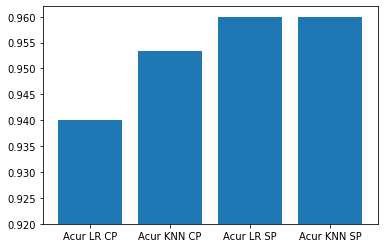

In [504]:
import matplotlib.pyplot as plt

colunas = ['Acur LR CP', 'Acur KNN CP', 'Acur LR SP', 'Acur KNN SP']
plt.bar(colunas, np.array([compadAcuraccy, compadAcuraccy2, sempadAcuraccy1, sempadAcuraccy3])-0.92, bottom=0.92)
plt.show()

# LogisticRegression x KNeighborsClassifier - Precision
- LR: LogisticRegression
- KNN: KNeighborsClassifier
- CP: Com Padronização
- SP: Sem Padronização

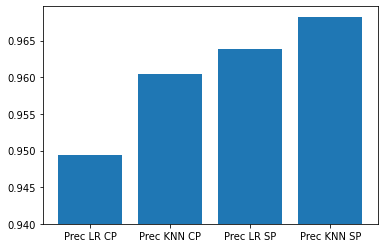

In [505]:
colunas = ['Prec LR CP', 'Prec KNN CP', 'Prec LR SP', 'Prec KNN SP']
plt.bar(colunas, np.array([compadPrecision, compadPrecision2, sempadPrecision1, sempadPrecision3])-0.94, bottom=0.94)
plt.show()